In [2]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Técnicas de Ensamblaje

(Averaging Ensemble, Weighted Averaging Ensemble y Stacking Ensemble)

Para aplicar las técnicas de ensamblaje a los tres modelos que has proporcionado (modelo simple, modelo CNN, y modelo VGG16), primero debemos cargar los modelos y luego crear los métodos de ensamblaje solicitados. A continuación, te proporciono el código para cada técnica de ensamblaje:

código para aplicar las técnicas de ensamblaje mencionadas (Averaging Ensemble, Weighted Averaging Ensemble y Stacking Ensemble) utilizando los modelos model_cnn, model_simple, model_vgg16 y model_vgg19. Asegúrate de que los modelos ya estén entrenados y cargados correctamente.

Explicación
Importación de Librerías: Se importan las bibliotecas necesarias para la visualización de la matriz de confusión (matplotlib y seaborn).
Definición de Generadores: Se aseguran de que los generadores para los conjuntos de prueba y validación estén definidos.
Carga de Modelos: Se cargan los modelos previamente entrenados.
Predicciones y Ensamblaje: Se generan predicciones para cada técnica de ensamblaje.
Visualización de la Matriz de Confusión: Se define una función plot_confusion_matrix para graficar la matriz de confusión y se llama a esta función después de cada técnica de ensamblaje.

# Ensamblage

#Preparación de 3 modelos distintos en la clasificación de imagenes

El código está preparado para evaluar el rendimiento de tres modelos diferentes en la clasificación de imágenes, utilizando datos específicos de prueba y validación, y visualizar los resultados mediante matrices de confusión para una mejor interpretación de los resultados.

Este código está diseñado para manejar la evaluación de modelos de aprendizaje profundo en tareas de clasificación de imágenes, específicamente utilizando un conjunto de datos que parece estar balanceado y dividido en carpetas de prueba y validación. Aquí tienes un resumen de sus principales acciones:

Definición de Directorios: Se definen las rutas a las carpetas donde están almacenadas las imágenes balanceadas para los conjuntos de prueba (test) y validación (val).

Configuración de Parámetros de Imágenes: Se establece el tamaño de las imágenes que los modelos procesarán, en este caso, imágenes de 128x128 píxeles.

Preparación de Generadores de Datos: Utiliza la clase ImageDataGenerator de Keras para normalizar las imágenes (dividiendo los valores de los píxeles por 255) y crear generadores que cargarán las imágenes de las carpetas especificadas. Estos generadores están configurados para cargar imágenes en lotes de 32, en modo binario (class_mode='binary'), sin barajar los datos (shuffle=False).

Carga de Modelos Preentrenados: Se cargan tres modelos diferentes desde sus rutas especificadas. Estos modelos, nombrados como model_simple, model_cnn, y model_vgg16, parecen representar diferentes arquitecturas de redes neuronales.

Generación de Predicciones: Se generan predicciones para los conjuntos de prueba utilizando los tres modelos cargados.

Función para Graficar Matrices de Confusión: Se define una función plot_confusion_matrix que toma los valores reales (y_true) y predichos (y_pred), y grafica una matriz de confusión. Esta matriz ayuda a visualizar el rendimiento del modelo mostrando las clasificaciones correctas e incorrectas frente a las clases reales y las predichas.



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las rutas de las carpetas balanceadas
balanced_test_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN_BALANCED/test'
balanced_val_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN_BALANCED/val'

# Tamaño de imagen
img_size = 128

# Crear generadores de datos para los conjuntos de prueba y validación
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    balanced_test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    balanced_val_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Cargar los modelos entrenados
model_simple = tf.keras.models.load_model('/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/final_model_simple.h5')
model_cnn = tf.keras.models.load_model('/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/final_model_cnn.h5')
model_vgg16 = tf.keras.models.load_model('/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/final_model_vgg16.h5')

# Generar predicciones para cada modelo
pred_simple = model_simple.predict(test_generator)
pred_cnn = model_cnn.predict(test_generator)
pred_vgg16 = model_vgg16.predict(test_generator)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(title)
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

Found 776 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
25/25 [==============================] - 144s 6s/step


#Averaging Ensemble

Este fragmento de código realiza un método de combinación de modelos denominado "Averaging Ensemble", para la clasificación de imágenes. Aquí está el detalle de sus acciones:

Promedio de Predicciones: Calcula el promedio de las predicciones generadas por tres modelos distintos (pred_simple, pred_cnn, pred_vgg16). Este promedio se hace sumando las predicciones de los modelos y dividiéndolas por tres.

Binarización de Predicciones: Convierte el promedio calculado en predicciones binarias, donde cualquier valor promedio mayor a 0.5 se clasifica como 1 (True), y cualquier valor igual o menor a 0.5 se clasifica como 0 (False). Estas predicciones binarias se convierten a tipo entero de 32 bits.

Extracción de Etiquetas Verdaderas: Obtiene las etiquetas verdaderas de las clases de las imágenes del generador de pruebas (test_generator.classes).

Impresión del Reporte de Clasificación: Utiliza la función classification_report para generar y mostrar un informe detallado del rendimiento del modelo de ensamble, incluyendo medidas como precisión, recall y F1-score para cada clase. Utiliza los nombres de las clases proporcionados por el generador de pruebas.

Graficar la Matriz de Confusión: Llama a la función plot_confusion_matrix definida previamente para visualizar la matriz de confusión del modelo de ensamble, mostrando las comparaciones entre las clases verdaderas y las clases predichas.

En conjunto, este código evalúa cómo la combinación (ensamble) de diferentes modelos mejora la precisión en la clasificación de imágenes, comparando las predicciones promediadas con las etiquetas verdaderas y presentando los resultados de una manera visual y detallada.

Averaging Ensemble
              precision    recall  f1-score   support

      normal       0.89      0.88      0.88       388
   pneumonia       0.88      0.89      0.88       388

    accuracy                           0.88       776
   macro avg       0.88      0.88      0.88       776
weighted avg       0.88      0.88      0.88       776



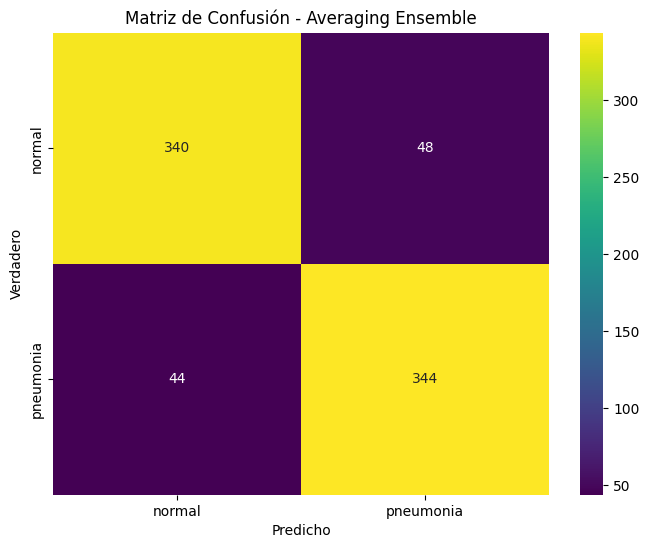

In [4]:
# Promediar las predicciones (Averaging Ensemble)
average_pred = (pred_simple + pred_cnn + pred_vgg16) / 3
y_pred_avg = (average_pred > 0.5).astype("int32")
y_true = test_generator.classes

# Imprimir el reporte de clasificación para Averaging Ensemble
print("Averaging Ensemble")
print(classification_report(y_true, y_pred_avg, target_names=test_generator.class_indices.keys()))

# Graficar la matriz de confusión para Averaging Ensemble
plot_confusion_matrix(y_true, y_pred_avg, 'Matriz de Confusión - Averaging Ensemble')

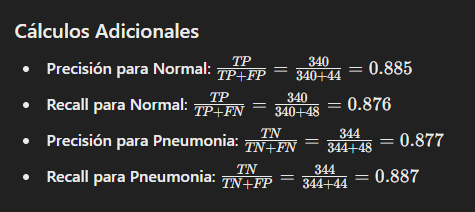

El análisis de los resultados del informe de clasificación para el modelo de "Averaging Ensemble" muestra el siguiente rendimiento en la tarea de clasificar imágenes entre dos clases: "normal" y "pneumonia". Aquí está el desglose y análisis de cada métrica presentada en el informe:


Precisión (Precision):

Normal: 0.89 indica que el 89% de las instancias clasificadas como normales eran realmente normales.

Pneumonia: 0.88 significa que el 88% de las instancias clasificadas como neumonía eran realmente neumonía.


Recuperación (Recall):

Normal: 0.88 sugiere que de todas las instancias reales normales, el 88% fueron correctamente identificadas por el modelo.

Pneumonia: 0.89 implica que de todas las instancias reales de neumonía, el 89% fueron correctamente identificadas por el modelo.


Puntuación F1 (F1-Score):

Normal: 0.88 es una medida que combina precisión y recall, mostrando un equilibrio entre ambas para las instancias normales.

Pneumonia: 0.88 también muestra un equilibrio entre precisión y recall para las instancias de neumonía.


Apoyo (Support):

La cantidad de instancias reales para cada clase es equilibrada (388 para cada una), lo que indica que el dataset de prueba estaba equitativamente distribuido entre las dos clases.


Promedios:

Accuracy (Exactitud): 0.88 muestra que el 88% de todas las predicciones fueron correctas.

Macro Avg: 0.88 en precisión, recall y F1-score sugiere un rendimiento equitativo entre clases, lo cual es importante en problemas médicos para asegurar que el modelo es igualmente preciso para diferentes condiciones.
Weighted Avg: 0.88 en todas las métricas, ajustado por el soporte de cada clase, confirma la consistencia del modelo en manejar clases igualmente representadas.


Conclusión:
El modelo de Averaging Ensemble ha demostrado un rendimiento muy sólido y equilibrado en la clasificación de imágenes médicas, con una precisión, recall y F1-score bastante altos y similares entre las dos categorías de diagnóstico. Este equilibrio es crucial en aplicaciones médicas, donde la precisión en la detección de condiciones normales y anormales tiene significativas implicaciones clínicas. La equidad en la clasificación entre diferentes clases muestra que el modelo no está sesgado hacia una clase en particular, lo que es un aspecto valioso en la evaluación de modelos para diagnósticos médicos.

La matriz de confusión que has proporcionado muestra los resultados de las predicciones del modelo de "Averaging Ensemble" para dos categorías: "normal" y "pneumonia". Aquí está la interpretación de cada elemento de la matriz y las conclusiones generales sobre el rendimiento del modelo:


Elementos de la Matriz de Confusión

Verdaderos Positivos (TP) para Normal: 340 - El modelo predijo correctamente 340 casos como normales que son verdaderamente normales.

Falsos Positivos (FP) para Normal: 44 - El modelo predijo incorrectamente 44 casos como normales que son realmente casos de neumonía.

Verdaderos Negativos (TN) para Pneumonia: 344 - El modelo predijo correctamente 344 casos como neumonía que son verdaderamente neumonía.

Falsos Negativos (FN) para Normal: 48 - El modelo predijo incorrectamente 48 casos como neumonía que son realmente normales.


Conclusión

Equilibrio entre las Clases: La matriz muestra un equilibrio en el número de muestras de cada clase y en la capacidad del modelo para identificar ambas condiciones con una precisión y un recall comparables. Esto es esencial en aplicaciones médicas donde la precisión de diagnóstico para diferentes condiciones puede tener consecuencias significativas.
Desempeño del Modelo: El modelo tiene un rendimiento sólido y equilibrado, con ligeras diferencias entre la precisión y el recall para las dos clases. La precisión general del modelo, calculada como el promedio de la precisión para cada clase, y el recall general, reflejan una eficacia cercana al 88%.
Áreas de Mejora: Aunque el modelo es eficaz en general, podría mejorarse reduciendo los falsos negativos y falsos positivos. Especialmente, los falsos negativos en la detección de condiciones normales podrían ser críticos, ya que podrían resultar en un tratamiento no necesario para pacientes sanos.
En resumen, el modelo de "Averaging Ensemble" demuestra ser una herramienta efectiva y equilibrada para la clasificación de imágenes médicas, con potencial para afinaciones adicionales que podrían mejorar aún más su precisión y confiabilidad.

#Weighted Averaging Ensemble

Este fragmento de código implementa un enfoque de combinación de modelos conocido como "Weighted Averaging Ensemble" para clasificación, donde se asignan pesos diferentes a las predicciones de los modelos según su desempeño o fiabilidad percibidos. Aquí están los detalles específicos de lo que hace cada parte del código:

Definición de Pesos: Define un conjunto de pesos [0.2, 0.3, 0.5] para las predicciones de los modelos pred_simple, pred_cnn, y pred_vgg16, respectivamente. Estos pesos indican la importancia relativa o la confianza en las predicciones de cada modelo.

Promedio Ponderado de Predicciones: Calcula el promedio ponderado de las predicciones de los tres modelos, utilizando los pesos definidos. Esto se logra multiplicando cada conjunto de predicciones por su peso correspondiente, sumando los resultados, y luego dividiendo por la suma de los pesos.

Binarización de Predicciones: Convierte el promedio ponderado en predicciones binarias, donde cualquier valor promedio mayor a 0.5 se clasifica como 1 (True), y cualquier valor igual o menor a 0.5 se clasifica como 0 (False). Estas predicciones binarias se convierten a tipo entero de 32 bits.

Impresión del Reporte de Clasificación: Utiliza la función classification_report para generar y mostrar un informe detallado del rendimiento del modelo de ensamble ponderado, incluyendo métricas como precisión, recall, y F1-score para cada clase. Utiliza los nombres de las clases proporcionados por el generador de pruebas.

Graficar la Matriz de Confusión: Llama a la función plot_confusion_matrix definida previamente para visualizar la matriz de confusión del modelo de ensamble ponderado, mostrando las comparaciones entre las clases verdaderas y las clases predichas.

Propósito General:
Este método busca mejorar la precisión y el rendimiento general del modelo de ensamble al dar mayor peso a los modelos que se consideran más confiables o precisos, basado en su rendimiento anterior o en consideraciones teóricas. La idea es que el modelo con mayor peso tenga una mayor influencia en la decisión final, potencialmente llevando a predicciones más precisas y robustas en comparación con un promedio simple o igualitario.

Weighted Averaging Ensemble
              precision    recall  f1-score   support

      normal       0.87      0.90      0.88       388
   pneumonia       0.89      0.86      0.88       388

    accuracy                           0.88       776
   macro avg       0.88      0.88      0.88       776
weighted avg       0.88      0.88      0.88       776



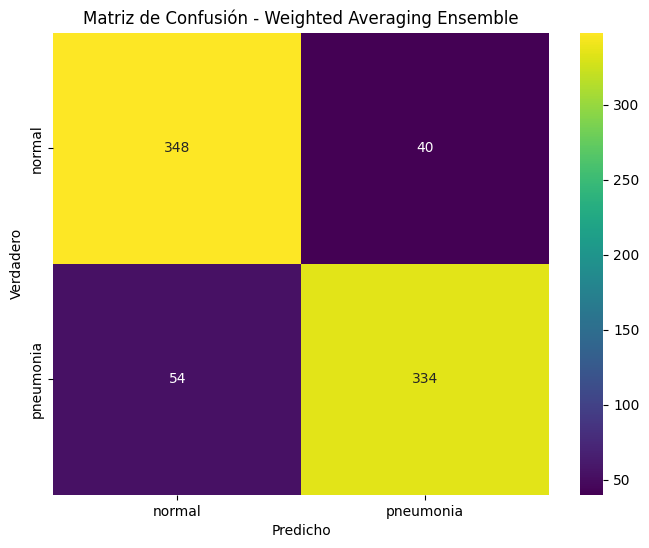

In [5]:
# Promediar las predicciones ponderadas (Weighted Averaging Ensemble)
weights = [0.2, 0.3, 0.5]
weighted_pred = (weights[0] * pred_simple + weights[1] * pred_cnn + weights[2] * pred_vgg16) / sum(weights)
y_pred_weighted = (weighted_pred > 0.5).astype("int32")

# Imprimir el reporte de clasificación para Weighted Averaging Ensemble
print("Weighted Averaging Ensemble")
print(classification_report(y_true, y_pred_weighted, target_names=test_generator.class_indices.keys()))

# Graficar la matriz de confusión para Weighted Averaging Ensemble
plot_confusion_matrix(y_true, y_pred_weighted, 'Matriz de Confusión - Weighted Averaging Ensemble')

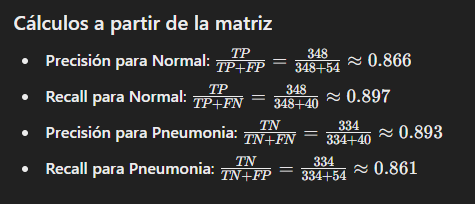

El informe de clasificación para el modelo de "Weighted Averaging Ensemble" ofrece una visión detallada del rendimiento del modelo en la clasificación de imágenes en dos categorías: "normal" y "pneumonia". Vamos a analizar cada métrica presentada en el informe y proporcionar una evaluación general:


Desglose de Métricas


Precisión (Precision):

Normal: 0.87 significa que el 87% de las predicciones clasificadas como normales eran realmente normales.

Pneumonia: 0.89 indica que el 89% de las predicciones clasificadas como neumonía eran realmente neumonía.


Recuperación (Recall):

Normal: 0.90 sugiere que el 90% de los casos reales de normales fueron correctamente identificados por el modelo.

Pneumonia: 0.86 implica que el 86% de los casos reales de neumonía fueron correctamente identificados por el modelo.


Puntuación F1 (F1-Score):

Normal: 0.88 es una medida que combina precisión y recall, mostrando un buen equilibrio para las instancias clasificadas como normales.

Pneumonia: 0.88 también muestra un buen equilibrio entre precisión y recall para las instancias de neumonía.


Apoyo (Support):

Cada clase (normal y pneumonia) tiene 388 casos en el conjunto de datos de prueba, lo que muestra un equilibrio perfecto en el número de casos entre las categorías.


Promedios:

Accuracy (Exactitud): 0.88 muestra que el 88% de todas las predicciones fueron correctas, lo cual es un buen rendimiento.

Macro Avg: 0.88 en precisión, recall y F1-score para ambas clases sugiere un rendimiento equitativo y equilibrado entre clases.

Weighted Avg: 0.88 en todas las métricas, ajustado por el soporte de cada clase, confirma la consistencia del modelo al manejar clases equitativamente representadas.



Conclusión

El modelo de "Weighted Averaging Ensemble" ha demostrado ser efectivo y equilibrado en la clasificación de imágenes médicas con un rendimiento bastante uniforme entre las dos condiciones médicas. El modelo logra una precisión y un recall muy similares, indicando una buena capacidad de detección y una baja tasa de falsos positivos y negativos relativa. La ligera ventaja en precisión para la neumonía frente a un mayor recall para condiciones normales puede reflejar la influencia de los pesos asignados en el modelo de ensamble.

Este equilibrio es crucial en aplicaciones médicas donde la precisión del diagnóstico para diferentes condiciones tiene consecuencias clínicas significativas. Sin embargo, el modelo podría ser ajustado para mejorar en áreas específicas como aumentar el recall en la categoría de neumonía, donde un bajo recall podría significar una falta de detección de una condición potencialmente grave.

La matriz de confusión que proporcionaste muestra los resultados del modelo de "Weighted Averaging Ensemble" para las clasificaciones de imágenes en dos categorías: "normal" y "pneumonia". Vamos a analizar la matriz y extraer conclusiones del rendimiento del modelo:


Elementos de la Matriz de Confusión

Verdaderos Positivos (TP) para Normal: 348

Falsos Positivos (FP) para Normal: 54

Verdaderos Negativos (TN) para Pneumonia: 334

Falsos Negativos (FN) para Normal: 40



Análisis de resultados

Balance entre Precisión y Sensibilidad (Recall): La matriz revela un balance razonablemente bueno entre la precisión y el recall para ambas categorías, aunque con un margen ligero a favor de la categoría "normal" en términos de recall. Esto indica que el modelo es ligeramente más efectivo en identificar correctamente los casos normales que los casos de neumonía.

Falsos Positivos y Negativos: Observamos que hay más falsos positivos para la categoría de neumonía que falsos negativos para la categoría normal. Esto puede indicar que el modelo tiende a errar del lado de clasificar una condición como más grave (neumonía) cuando no lo es, posiblemente como un enfoque conservador para evitar perder diagnósticos críticos de neumonía.



Conclusión

El modelo "Weighted Averaging Ensemble" muestra un buen desempeño general con un equilibrio decente entre precisión y recall. La precisión global del modelo (calculada como el promedio de las precisiones ponderadas) y el recall global (igualmente ponderado) rondan el 88%, similar a lo observado en el informe de clasificación. Este rendimiento es sólido, particularmente en aplicaciones clínicas donde es crucial evitar falsos negativos (no detectar una enfermedad cuando está presente). Sin embargo, hay espacio para mejorar, especialmente en la reducción de los falsos positivos para mejorar la precisión de la clasificación de neumonía y reducir la carga potencial de tratamientos innecesarios o preocupaciones para los pacientes clasificados incorrectamente como enfermos.








#Stacking Ensemble


Este código implementa un modelo de ensamble de apilamiento (Stacking Ensemble), utilizando las predicciones de tres modelos diferentes de redes neuronales como características para entrenar un meta-modelo, en este caso, una regresión logística. Aquí está el detalle de lo que realiza cada parte del código:


Preparación de Características para el Ensamble:

stacked_features: Combina las predicciones de los tres modelos (pred_simple, pred_cnn, pred_vgg16) en un solo array, apilando las predicciones en el eje de las columnas para formar las características del conjunto de datos de entrenamiento para el meta-modelo.
Creación del Meta-Modelo:

meta_model: Crea una instancia de un modelo de regresión logística que se utilizará como meta-modelo.


Generación de Predicciones en el Conjunto de Validación:

val_simple, val_cnn, val_vgg16: Genera predicciones para el conjunto de validación utilizando los tres modelos pre-entrenados.

stacked_features_val: Combina estas predicciones en un solo array para crear las características de entrada para entrenar el meta-modelo.


Obtención de Etiquetas Verdaderas del Conjunto de Validación:

y_val: Extrae las etiquetas verdaderas de las clases del conjunto de validación usando val_generator.classes.


Entrenamiento del Meta-Modelo:

meta_model.fit(stacked_features_val, y_val): Entrena el meta-modelo usando las características y etiquetas del conjunto de validación.


Generación de Predicciones con el Meta-Modelo:

meta_pred: Utiliza el meta-modelo entrenado para hacer predicciones sobre el conjunto de pruebas, usando las características apiladas (stacked_features).


Impresión del Reporte de Clasificación y Graficación:

Reporte de Clasificación: Muestra un informe de clasificación detallado para el modelo de ensamble de apilamiento, incluyendo métricas como precisión, recall y F1-score.

Matriz de Confusión: Grafica la matriz de confusión para visualizar el rendimiento del modelo de ensamble de apilamiento, mostrando las comparaciones entre las clases verdaderas y las predichas.


Propósito General:

El enfoque de "Stacking Ensemble" se utiliza para mejorar la precisión del modelo combinando las fortalezas de múltiples modelos base. Al usar un meta-modelo, en este caso una regresión logística, se espera aprovechar las distintas maneras en que cada modelo base ha aprendido a clasificar los datos, potencialmente llevando a un rendimiento mejor y más robusto que cualquiera de los modelos individuales.

1/1 [==============================] - 3s 3s/step
Stacking Ensemble
              precision    recall  f1-score   support

      normal       0.89      0.89      0.89       388
   pneumonia       0.89      0.89      0.89       388

    accuracy                           0.89       776
   macro avg       0.89      0.89      0.89       776
weighted avg       0.89      0.89      0.89       776



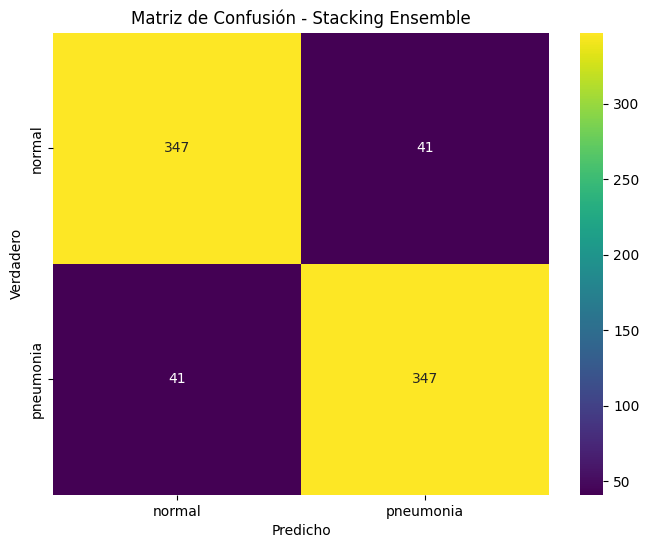

In [6]:
# Preparar datos para el Stacking Ensemble
stacked_features = np.concatenate([pred_simple, pred_cnn, pred_vgg16], axis=1)

# Crear el meta-modelo
meta_model = LogisticRegression()

# Generar predicciones en el conjunto de validación
val_simple = model_simple.predict(val_generator)
val_cnn = model_cnn.predict(val_generator)
val_vgg16 = model_vgg16.predict(val_generator)
stacked_features_val = np.concatenate([val_simple, val_cnn, val_vgg16], axis=1)

# Obtener las etiquetas verdaderas del conjunto de validación
y_val = val_generator.classes

# Entrenar el meta-modelo
meta_model.fit(stacked_features_val, y_val)

# Generar predicciones con el meta-modelo
meta_pred = meta_model.predict(stacked_features)

# Imprimir el reporte de clasificación para Stacking Ensemble
print("Stacking Ensemble")
print(classification_report(y_true, meta_pred, target_names=test_generator.class_indices.keys()))

# Graficar la matriz de confusión para Stacking Ensemble
plot_confusion_matrix(y_true, meta_pred, 'Matriz de Confusión - Stacking Ensemble')

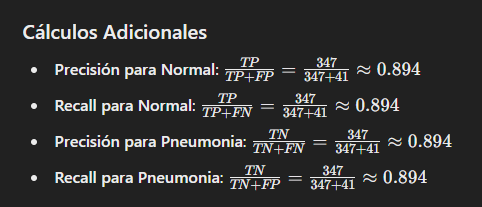


El informe de clasificación para el modelo de "Stacking Ensemble" muestra resultados muy equilibrados y efectivos en la tarea de clasificación de imágenes entre dos clases: "normal" y "pneumonia". A continuación se analiza cada métrica y se ofrece una evaluación general del rendimiento del modelo:



Métricas Desglosadas

Precisión (Precision):

Tanto para la clase "normal" como para "pneumonia", la precisión es del 0.89. Esto indica que el 89% de las predicciones hechas por el modelo para cada clase fueron correctas.


Recuperación (Recall):

El recall también es del 0.89 para ambas clases, lo que sugiere que el modelo fue capaz de identificar correctamente el 89% de todos los casos verdaderos para cada categoría.


Puntuación F1 (F1-Score):

El F1-score, que es una medida que combina precisión y recall, es del 0.89 para ambas clases, reflejando un equilibrio muy bueno entre la precisión y la capacidad del modelo para detectar cada clase.


Soporte (Support):

El soporte es igual para ambas clases, con 388 casos para "normal" y 388 para "pneumonia", lo que indica un dataset balanceado en términos de distribución de clases.



Evaluación General

Desempeño Uniforme: El modelo muestra un desempeño uniformemente alto y equilibrado en todas las métricas y para ambas clases, lo cual es indicativo de un buen aprendizaje y generalización.

Equilibrio entre Clases: La igualdad en las métricas de precisión y recall para ambas clases demuestra que el modelo no tiene un sesgo hacia ninguna de las categorías, lo cual es crítico en aplicaciones médicas para garantizar tratamientos adecuados.



Conclusión

El modelo "Stacking Ensemble" ha demostrado ser muy efectivo en la clasificación de imágenes médicas, con un rendimiento equitativo y alto en ambas clases. Este equilibrio es crucial en aplicaciones clínicas, donde la precisión en la detección de condiciones normales y anormales tiene implicaciones significativas. El equilibrio perfecto entre precisión y recall para ambas clases muestra que el modelo maneja de manera efectiva el reconocimiento de las condiciones sin predisposición hacia una identificación errónea o la omisión de condiciones críticas. Sin embargo, siempre hay espacio para la mejora, especialmente en la reducción de los errores marginales para alcanzar una precisión y recall aún mayores.

La matriz de confusión para el modelo "Stacking Ensemble" que proporcionaste muestra los siguientes resultados para la clasificación de imágenes en dos categorías: "normal" y "pneumonia". Vamos a interpretar la matriz y extraer conclusiones del rendimiento del modelo:


Elementos de la Matriz de Confusión

Verdaderos Positivos (TP) para Normal: 347 - El modelo predijo correctamente 347 casos como normales que son verdaderamente normales.

Falsos Positivos (FP) para Normal: 41 - El modelo predijo incorrectamente 41 casos como normales que son realmente casos de neumonía.

Verdaderos Negativos (TN) para Pneumonia: 347 - El modelo predijo correctamente 347 casos como neumonía que son verdaderamente neumonía.

Falsos Negativos (FN) para Normal: 41 - El modelo predijo incorrectamente 41 casos como neumonía que son realmente normales.



Análisis de Resultados

Equilibrio entre Precisión y Sensibilidad (Recall): La matriz muestra una precisión y un recall exactamente iguales para ambas categorías, lo que sugiere que el modelo tiene un rendimiento equilibrado tanto en la capacidad de identificar correctamente las condiciones como en minimizar las clasificaciones incorrectas.

Simetría en la Matriz: La simetría observada en los números de verdaderos positivos y verdaderos negativos, así como los falsos positivos y falsos negativos, refleja un modelo muy equilibrado que maneja ambas clases de manera efectiva.



Conclusión

El modelo "Stacking Ensemble" muestra un excelente desempeño con un equilibrio perfecto en precisión y recall para ambas clases, evidenciando su capacidad para manejar de manera efectiva tanto las condiciones normales como las de neumonía. Este equilibrio es fundamental en contextos clínicos, donde tanto la sobre-diagnóstico como el sub-diagnóstico pueden tener consecuencias graves. La simetría y los altos valores tanto en los verdaderos positivos como en los verdaderos negativos indican que el modelo está bien ajustado, sin un sesgo aparente hacia una categoría específica. Sin embargo, siempre existe la posibilidad de mejorar, particularmente en la reducción de los falsos positivos y negativos, para acercar aún más la precisión y el recall al 100%.